In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [ ]:
df = pd.read_csv('/content/cdc_train.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')


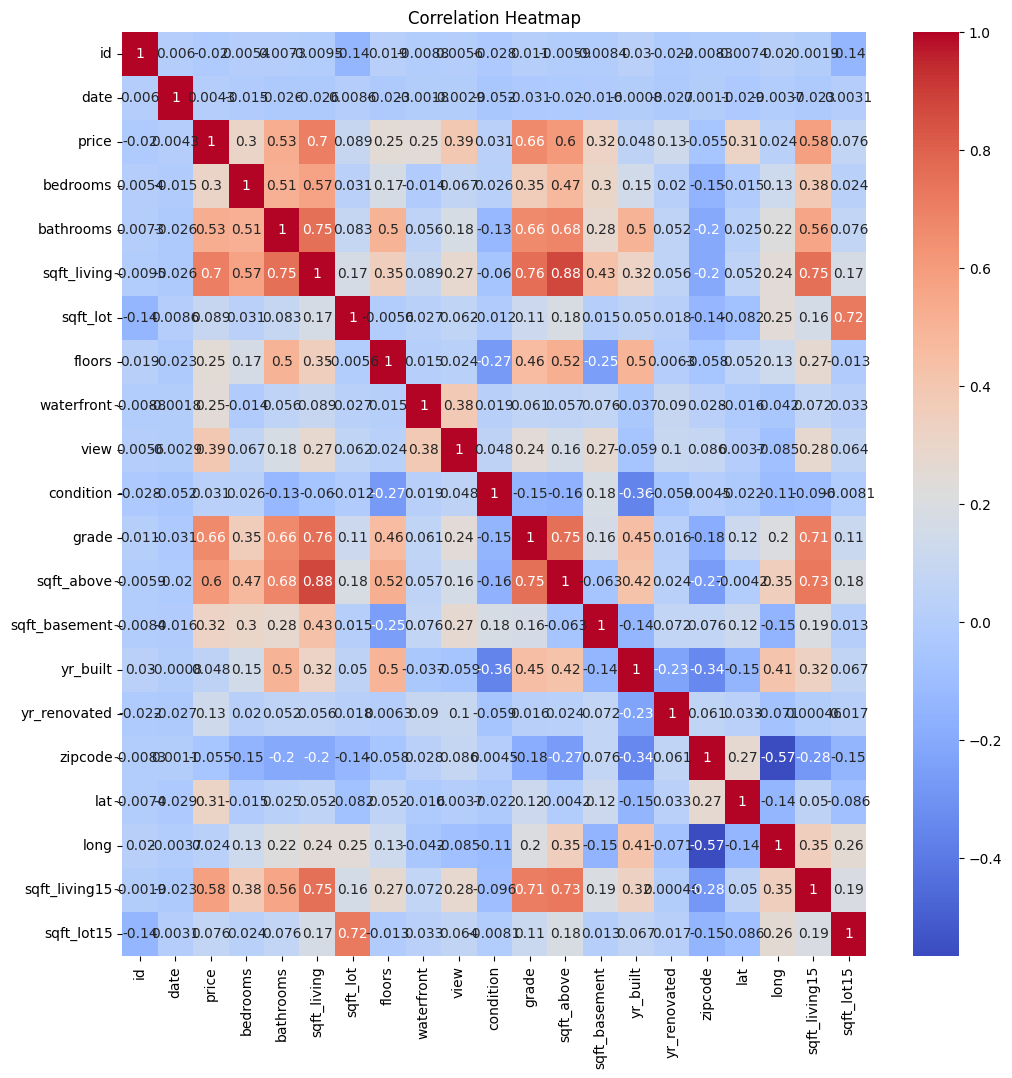

In [ ]:
corr = df.corr()

plt.figure(figsize=(12,12))

sns.heatmap(corr, annot=True, cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
#top correlated param to price

corr_with_price = corr['price'].sort_values(ascending=False).head(7)
print(corr_with_price)

price            1.000000
sqft_living      0.700933
grade            0.664266
sqft_above       0.602648
sqft_living15    0.581781
bathrooms        0.525487
view             0.390534
Name: price, dtype: float64


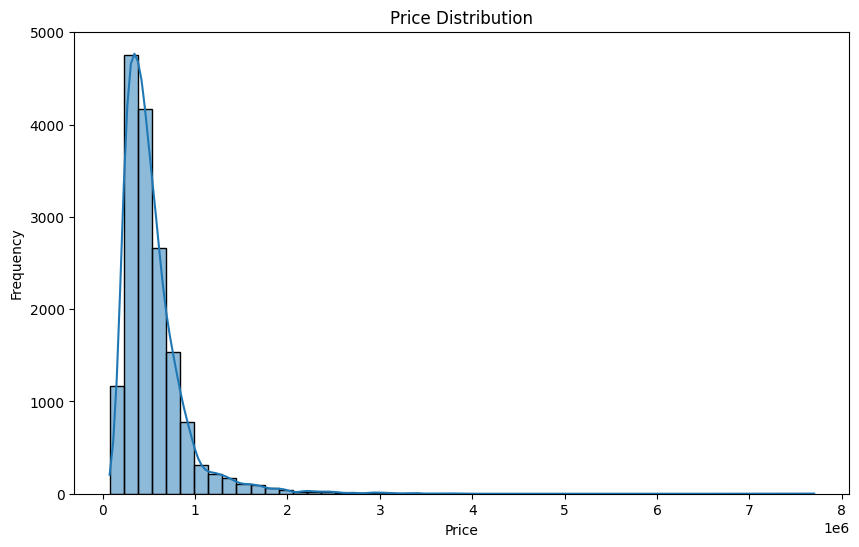

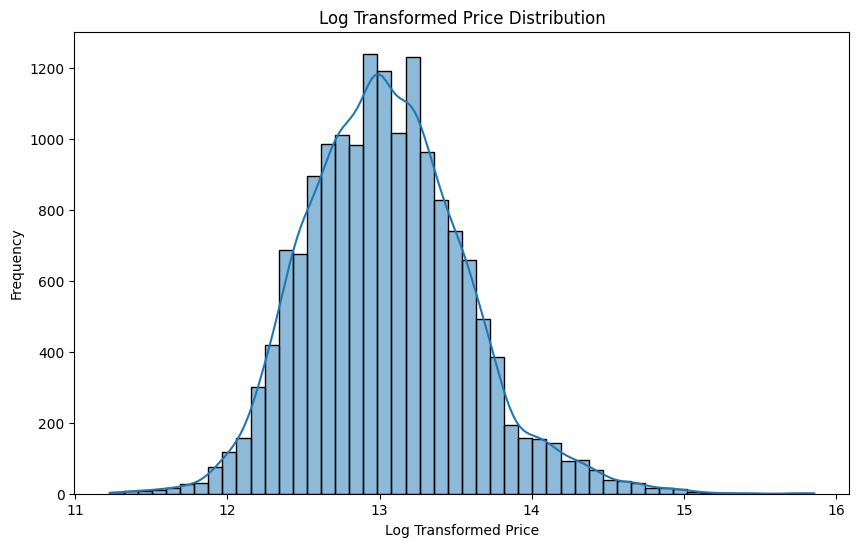

In [ ]:
#price distribution and interpretaion

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#price in log
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title('Log Transformed Price Distribution')
plt.xlabel('Log Transformed Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='sqft_living', ylabel='price'>

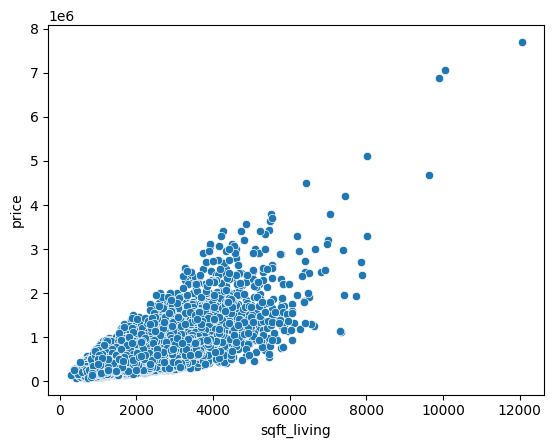

In [ ]:
sns.scatterplot(x='sqft_living', y='price', data=df)


In [ ]:
df[['sqft_above', 'sqft_basement']].describe()


,sqft_above,sqft_basement
count,16209.000000,16209.000000
mean,1784.754396,288.520205
std,821.820844,438.598910
min,290.000000,0.000000
25%,1200.000000,0.000000
50%,1560.000000,0.000000
75%,2200.000000,560.000000
max,8860.000000,4820.000000


<Axes: xlabel='waterfront', ylabel='price'>

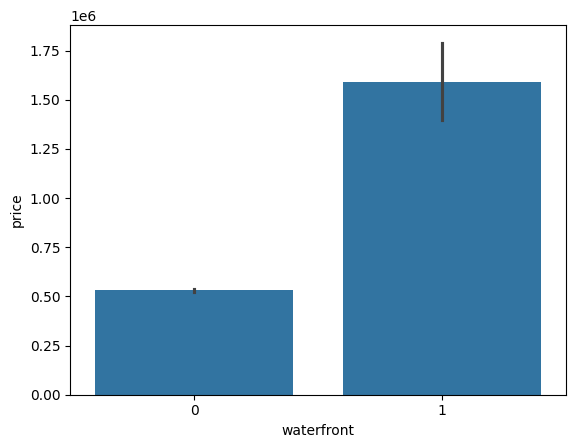

In [ ]:
df.groupby('waterfront')['price'].mean()

sns.barplot(x='waterfront', y='price', data=df)



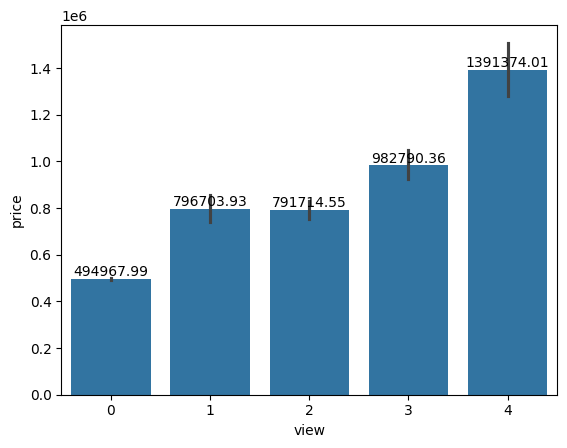

In [ ]:
df.groupby('view')['price'].mean()
ax = sns.barplot(x='view', y='price', data=df)
#show actual value above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

<Axes: xlabel='grade', ylabel='price'>

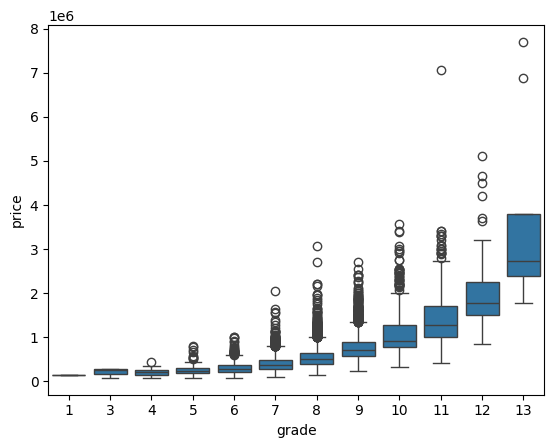

In [ ]:
sns.boxplot(x='grade', y='price', data=df)



In [ ]:
df.groupby('zipcode')['price'].mean().sort_values()


,price
zipcode,
98002,2.386830e+05
98168,2.425683e+05
98032,2.487609e+05
98148,2.770241e+05
98001,2.797596e+05
...,...
98102,9.336901e+05
98112,1.098366e+06
98040,1.198328e+06


<Axes: xlabel='long', ylabel='lat'>

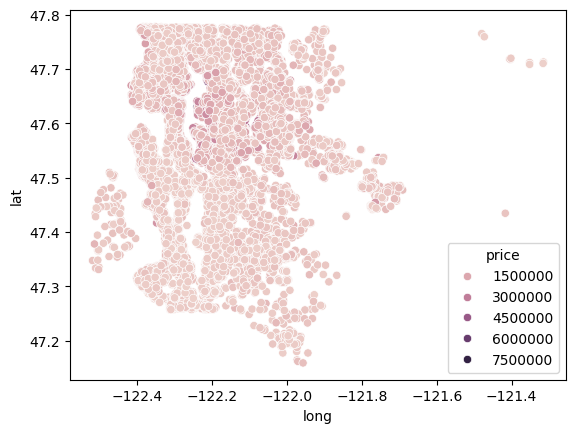

In [ ]:
sns.scatterplot(x='long', y='lat', hue='price', data=df)


In [ ]:
df['year'] = df['date'].dt.year
df.groupby('year')['price'].mean()


,price
year,
2014,534855.746133
2015,542975.888676


<Axes: ylabel='price'>

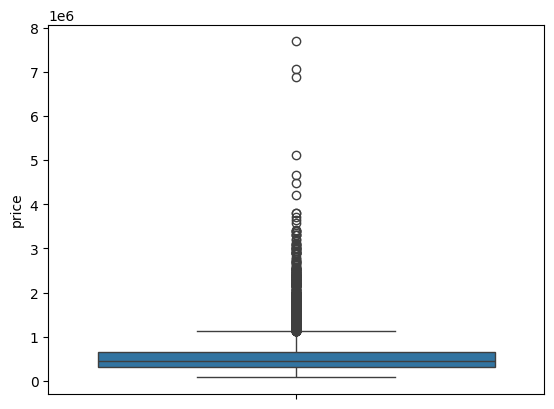

In [ ]:
sns.boxplot(df['price'])


In [ ]:
df['zipcode'].unique()

array([98055, 98031, 98003, 98027, 98042, 98117, 98155, 98072, 98001,
       98034, 98177, 98006, 98023, 98166, 98075, 98092, 98133, 98014,
       98065, 98115, 98144, 98038, 98109, 98112, 98074, 98029, 98136,
       98178, 98125, 98199, 98056, 98032, 98058, 98103, 98116, 98059,
       98030, 98052, 98033, 98102, 98011, 98040, 98146, 98022, 98118,
       98028, 98008, 98119, 98108, 98007, 98070, 98168, 98004, 98077,
       98107, 98198, 98045, 98005, 98053, 98126, 98188, 98039, 98106,
       98010, 98002, 98024, 98105, 98019, 98122, 98148])

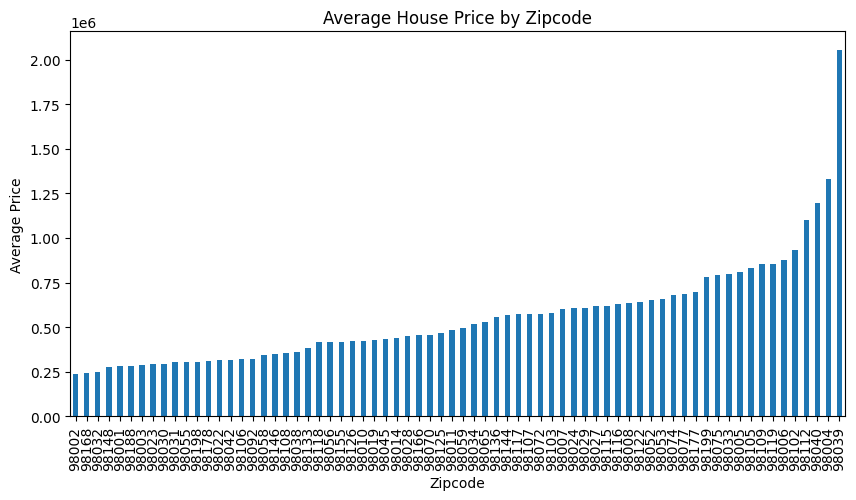

In [ ]:
zip_price = df.groupby('zipcode')['price'].mean().sort_values()

plt.figure(figsize=(10,5))
zip_price.plot(kind='bar')
plt.title("Average House Price by Zipcode")
plt.ylabel("Average Price")
plt.xlabel("Zipcode")
plt.xticks(rotation=90)
plt.show()


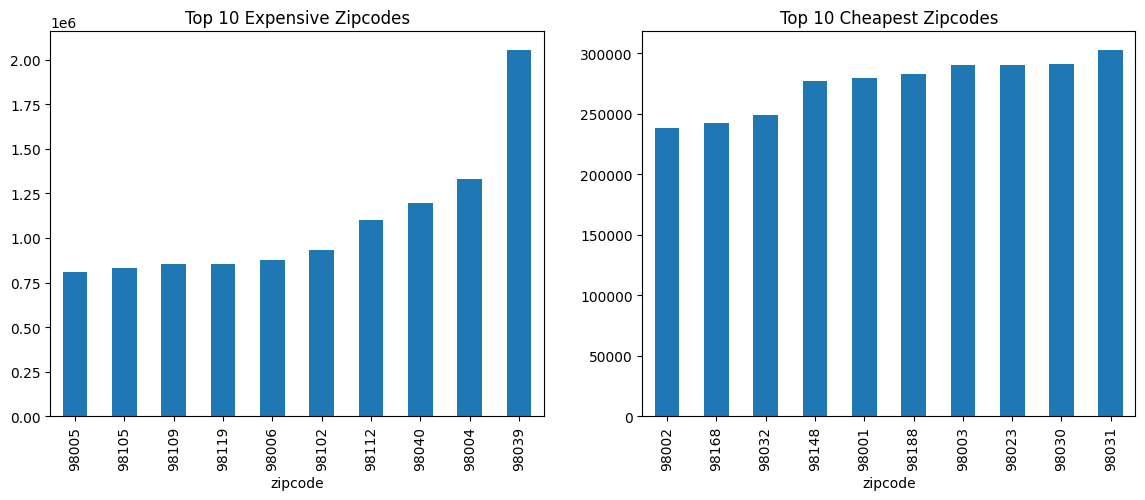

In [ ]:
top10 = zip_price.tail(10)
bottom10 = zip_price.head(10)

fig, ax = plt.subplots(1,2, figsize=(14,5))

top10.plot(kind='bar', ax=ax[0], title='Top 10 Expensive Zipcodes')
bottom10.plot(kind='bar', ax=ax[1], title='Top 10 Cheapest Zipcodes')

plt.show()


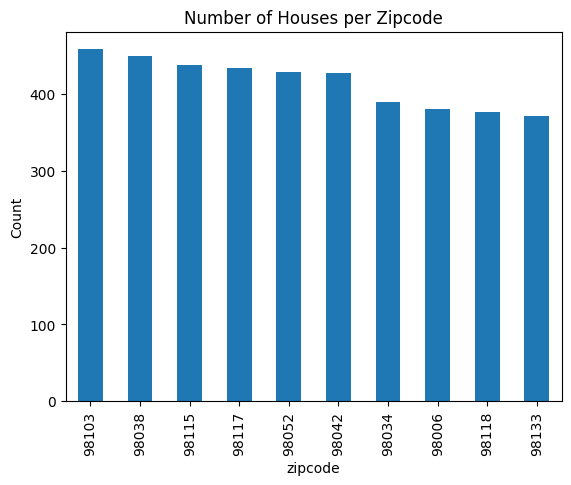

In [ ]:
df['zipcode'].value_counts().head(10).plot(kind='bar')
plt.title("Number of Houses per Zipcode")
plt.ylabel("Count")
plt.show()


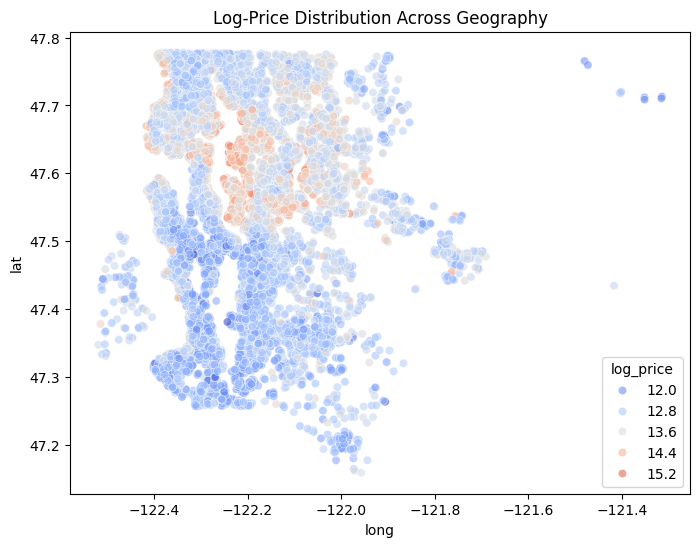

In [ ]:
df['log_price'] = np.log1p(df['price'])

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='long',
    y='lat',
    hue='log_price',
    data=df,
    palette='coolwarm',
    alpha=0.6
)
plt.title("Log-Price Distribution Across Geography")
plt.show()

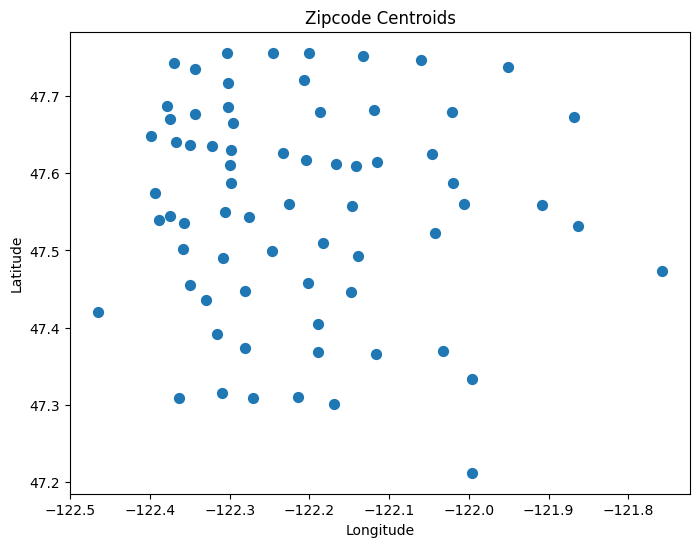

In [ ]:

zip_centers = df.groupby('zipcode')[['lat','long']].mean().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(zip_centers['long'], zip_centers['lat'], s=50)
plt.title("Zipcode Centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


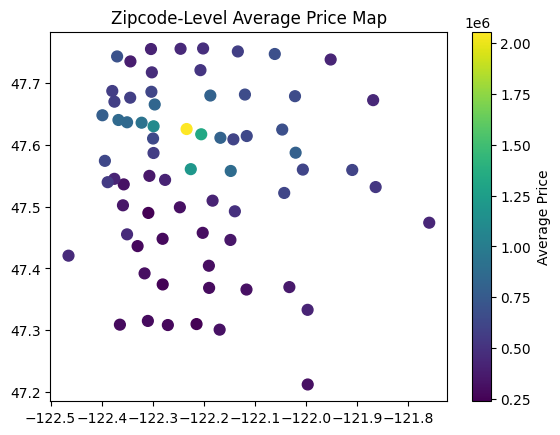

In [ ]:
zip_centers['avg_price'] = df.groupby('zipcode')['price'].mean().values

plt.scatter(
    zip_centers['long'],
    zip_centers['lat'],
    c=zip_centers['avg_price'],
    cmap='viridis',
    s=60
)
plt.colorbar(label='Average Price')
plt.title("Zipcode-Level Average Price Map")
plt.show()


In [ ]:
df['log_price'] = np.log1p(df['price'])

In [ ]:
y = df['log_price']
X = df.drop(['id', 'date', 'price', 'log_price'], axis=1)
print("Target variable 'y' and feature matrix 'X' defined successfully.")

Target variable 'y' and feature matrix 'X' defined successfully.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and test sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and test sets successfully.
X_train shape: (12967, 19)
X_test shape: (3242, 19)
y_train shape: (12967,)
y_test shape: (3242,)


In [ ]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully.")

XGBoost Regressor model trained successfully.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Root Mean Squared Error (RMSE): 0.1745
R-squared (R2): 0.8897


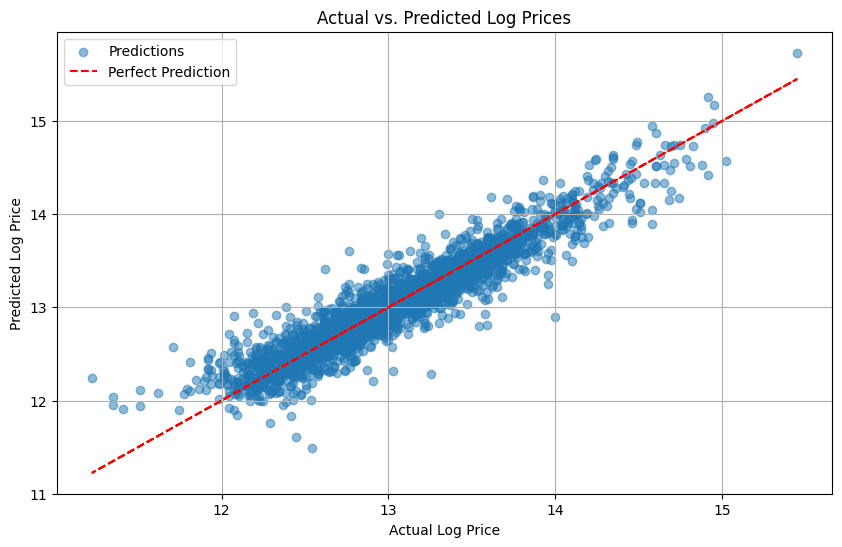

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Log Prices')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# train on random forest now

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Random Forest - R-squared (R2): {r2_rf:.4f}")



Random Forest - Root Mean Squared Error (RMSE): 0.1788
Random Forest - R-squared (R2): 0.8841


In [ ]:
#Gradient Tree boosting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"Gradient Boosting - R-squared (R2): {r2_gb:.4f}")


Gradient Boosting - Root Mean Squared Error (RMSE): 0.1819
Gradient Boosting - R-squared (R2): 0.8800
